#What is the True Normal Human Body Temperature? 

 Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for CLT to hold (read CLT carefully), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> Start by computing the margin of error and confidence interval.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What test did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [4]:
import pandas as pd
df = pd.read_csv('C:/Users/soone/Anaconda3/data/human_body_temperature.csv')

In [5]:
df.head(5)

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


In [58]:
import numpy as np
import matplotlib.pyplot as plt

1. Is the distribution of body temperatures normal? YES
       Mean, median and mode are approximately equal which suggests normal distribution. Also, see below, the plot of the ecdf of 'temperature' suggests normal distribution.           

In [8]:
temp_mean = df['temperature'].mean()
temp_median = df['temperature'].median()
from scipy import stats
temp_mode = stats.mode(df['temperature'])
print(temp_mean)
print(temp_median)
print(temp_mode)

98.24923076923078
98.3
ModeResult(mode=array([ 98.]), count=array([11]))


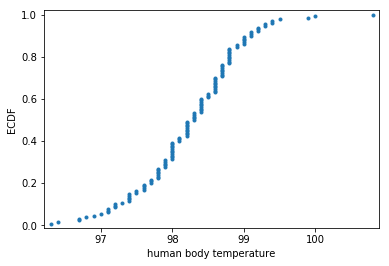

In [7]:
# 1. Is the distribution of body temperatures normal? YES
# Plot of the ecdf of 'temperature' suggests normal distribution
x = np.sort(df['temperature'])
y =  np.arange(1, len(x)+1) / len(x)
_ = plt.plot(x, y, marker='.', linestyle='none')
_ = plt.xlabel('human body temperature') 
_ = plt.ylabel('ECDF') 
plt.margins(0.02)
plt.show()

 2. Is the sample size large? YES
         Total of 130 observations. Generally a sample size is considered large if (n >= 30).

 2b.  Are the observations independent?
        Two observations are independent if the occurrence of one observation provides no information about the occurrence of the other observation. 
            Also, if the sample was not taken with replacement (no evidence of that here) then a sample is considered to be independent if < 10% of the total population.  If the total population here is assumed to be the entire human population, then we are safely under 10 percent with a total sample of 130.

In [50]:
size = len(df['temperature'])
print(size)

130


3. Is the true population mean really 98.6 degrees F? 
    Null hypothesis: Is the true population mean really 98.6 degrees F?
    Alternate hypothesis: Population mean is not equal to 98.6 degrees F.

• Would you use a one-sample or two-sample test? Why?
    A one sample test would be most appropriate as it compares one set of data to a single number, in this case, Wunderlich’s value of 98.6.
    
• In this situation, is it appropriate to use the t or z statistic?
    Generally, in sample sizes of n >= 30 it is appropriate to use the z-statistic which allows one to use the standard deviation of the sample in the denominator of the equation.  As our sample size is 130 we should use the z-statistic as the sample is normally distributed.
    
• Now try using the other test. How is the result be different? Why? 
    The equation for the z & t statistic are essentially the same. However, the t statistic is used when the sample size is < 30 and implies there is not normal distribution of the sample population.
    Z = T = np.mean(temp_obs) - Wunderlich_mean (or our value for diff below)/ (np.std(temp_obs)/(sqrt(130))
    Z is used where the sample size is generally greater than 30 and is normally distributed.
    T is used with smaller sample sizes where distribution is not likely normal.
    The values are the same but result in different p-values(values are looked up in two different tables) or probabilities that the Wunderlich mean falls within our sample distribution. In this case our sample mean is more than 5 std deviations below the Wunderlich value of 98.6.
    As we have a sample size > 30 the z-statistic would be appropriate which results in a p value of less than 0.0001.  In conclusion, we have a probability of less than 1 in 10,000 that a value from our sample population would be as great or greater than 98.6 degrees (F). This is confirmed below in our bootstrap analysis which also comes up with a p value of 0.0 with 10,000 samples.
    Using a T statistic of -5.47 we also see that this value is off the chart, even for a degree of freedom (n-1 = 129) and results in a probability < 0.0005.
    Z & T statistics yield a P values which come closer to each other (P(z) = P(t)) as the sample size grows larger.  With a sample size of 130 these values yield nearly the same probability.  The smaller the sample size, the greater the T value would need (number of std. dev. from the mean) to be to yield the same P value as would a Z statistic value.

In [52]:
Z = (np.mean(temp_obs) - 98.6) / (np.std(temp_obs)/ (130**(0.5)))

In [53]:
print(Z)

-5.475925202078116


In [12]:
# Null hypothesis: Is the true population mean really 98.6 degrees F?
# Alternate hypothesis: population mean is not equal to 98.6 degrees F.
# Begin by shifting mean of the test population to equal 98.6 degrees F
# We can also find a p-value by resampling our population and generating 10,000 replicates and finding the number
# of replicants with a value greater > 98.6. As determined below, we had none that were >= 98.6 strongly suggesting
# a rejection of the null hypothesis.
Wunderlich_mean = 98.6
temp_obs = df['temperature']
shifted_temp_obs = temp_obs - np.mean(temp_obs) + Wunderlich_mean
diff = np.mean(temp_obs) - Wunderlich_mean

# Define function to determine difference between Wunderlich's mean and those of the sample replicates
def diff_wunderlich(data, Wunderlich_mean=98.6): 
    return np.mean(data) - Wunderlich_mean

# Function to generate one bootstrap replicate
def bootstrap_replicate_1d(data, func):  
    """Generate bootstrap replicate of 1D data."""
    bs_sample = np.random.choice(data, len(data))
    return func(bs_sample)

# Function to generate multiple replicates
def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates."""
    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)
    # Generate replicates
    for i in range(size) :
        bs_replicates[i] = bootstrap_replicate_1d(data,func)
    return bs_replicates

bs_replicates = draw_bs_reps(shifted_temp_obs, diff_wunderlich, 10000)
p_value = np.sum(bs_replicates <= diff) / 10000
p_value
# Due to this low p-value, it is not likely that our sample mean is really Wunderlich's mean temperature (98.6).
# Less than 1 in 10000 bootstrap replicates of the sample population had a mean temperature >= 98.6

0.0

4. Draw a small sample of size 10 from the data and repeat both tests. 
    • Which one is the correct one to use?
        As the sample size now is <= 30, we should use the t-statistic
    • What do you notice? What does this tell you about the difference in application of the t and z statistics
        The T statistic calculated below for a sample of size 10 is ~-0.82 which yields a p value of > 0.2 which        is much greater than the p value calculated above when using the sample size of 130. This random sample had a        mean which was much closer to the Wunderlich value (98.6) and thus its population distribution was much more
likely to include a value >= 98.6.  We would not be able to reject the null hypothesis as above with the 130 population sample.
        Repeating the sampling gave a variety of results as expected. The last sampling below resulted in a mean temperature nearly identical to 98.6 (98.59) thus resulting in a very small T statistic and a large p value, or probability which validates the null hypothesis.
        I would conclude that the smaller our sample (T-statistic), the less reliable it is in predicting statistical significance of a mean or other parameter.

In [64]:
sample_pop = df['temperature'].sample(n=10)
print(np.mean(sample_pop))
print(sample_pop)

98.59
116    100.8
80      98.8
9       98.6
69      98.9
113     99.1
51      98.3
62      98.2
24      97.8
72      98.0
66      97.4
Name: temperature, dtype: float64


In [65]:
T = (np.mean(sample_pop) - 98.6) / (np.std(sample_pop)/ (10**(0.5)))
print(T)

-0.03555815446870252


5. At what temperature should we consider someone's temperature to be "abnormal"? 
    • Start by computing the margin of error and confidence interval. 
       Per the sample we are using (130 observations), below 98.1 and above 98.4 would be an abnormal body temperature. Here we generate 10,000 replicate samples compute the confidence interval and the standard deviation of the mean.

[ 98.12228846  98.37694231]
0.0640566146952
0.0645632311033


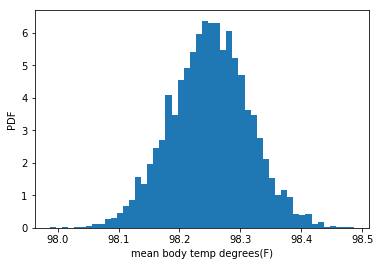

In [23]:
bs_replicates = draw_bs_reps(temp_obs,np.mean,10000)
conf_int = np.percentile(bs_replicates, [2.5, 97.5])
print(conf_int)

# Compute and print SEM
sem = np.std(temp_obs) / np.sqrt(len(temp_obs))
print(sem)

# Compute and print standard deviation of bootstrap replicates
bs_std = np.std(bs_replicates)
print(bs_std)

# Make a histogram of the results
_ = plt.hist(bs_replicates, bins=50, normed=True)
_ = plt.xlabel('mean body temp degrees(F)')
_ = plt.ylabel('PDF')

# Show the plot
plt.show()

6. Is there a significant difference between males and females in normal temperature? YES
• What test did you use and why?
    Null hypothesis: male normal temp mean = female normal temp mean
    Alternate hypothesis: male normal temp mean < female normal temp mean
    I will use a Z-test statistic and a one sample test to calculate the probability or p value that the mean body temp for the female popuation(~98.4) falls within the normal distribution of the male body temperature population.  I used the one sample test as I could compare one population (males) to a single value (female mean body temperature).  As the population (65) was greater than 30, the z test or statistic was appropriate.
    
• Write a story with your conclusion in the context of the original problem. 
    The actual mean for the male population is ~-0.29 less than the female mean body temperature, which at first glance suggests a rejection of the null hypothesis.
    To see if this difference is statistically significant, I will calculate the p value using those mean values and that difference. Sample population is > 30 so will use z-statistic.
    I will use the female mean temperature as the target mean value. This results in a z-statistic of -3.36 which means that the mean of the male body temp is ~ -3.36 standard deviations less than the female body temperature.
    This results in a p-value (taken from http://www.stat.ufl.edu/~athienit/Tables/Ztable.pdf) of 0.0004 (0.04%) which is less than the generally accepted value of 0.05 (alpha) necessary to support the null hypothesis.
    Therefore, I would conclude that there is strong evidence to reject the null hypothesis and conclude there is a significant statistical difference between male and female body temperatures per the population for this project.

In [43]:
temp_female = df['temperature'][df['gender'].str.contains('F')]
temp_male = df['temperature'][df['gender'].str.contains('M')]
temp_male_mean = np.mean(temp_male)
temp_female_mean = np.mean(temp_female)
diff = temp_male_mean - temp_female_mean
std_male_pop = np.std(temp_male)

In [44]:
print(temp_male_mean)
print(temp_female_mean)
print(diff)
print(std_male_pop)

98.1046153846154
98.39384615384613
-0.289230769230727
0.6933598841828696


In [49]:
Z = (temp_male_mean - temp_female_mean)/(std_male_pop/(65**(0.5)))
print(Z)

-3.3631207450440925
